# Machine Learning: Unsupervised Learning: Clustering: k-Means

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a few blobs of data for demonstration

Let's first generate a set of example data.  We will use the make_blobs function from sklearn to generate a set of clusters in 2D.

In [2]:
from sklearn.datasets import make_blobs

We will create 1000 random data points distributed in 6 clusters, and the spread of each cluster will have standard deviation of 1.

In [3]:
# making a 2D data set of 6 clusters
features, labels = make_blobs(
    n_samples = 1000,
    cluster_std = 1,     # standard deviation of each cluster
    center_box=(-12.0, 12.0),
    centers = 6,
    random_state = 2   # can set random seed
)

X, y = features, labels

Features are the 2D data points, and labels are the true cluster IDs for each cluster.

We will try to use k-means clustering algorithm to predict the clusters in the data set features, and check against the labels.

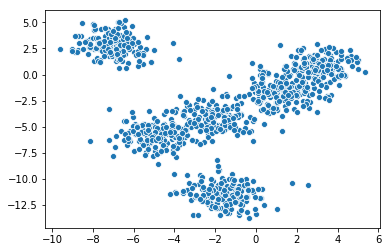

In [4]:
sns.scatterplot(x = X[:,0], y = X[:,1])

* our eyes can see six clusters?

# K-means model

In [5]:
from sklearn.cluster import KMeans

## Initial example, if we assumed there are 3 clusters

In [6]:
# create an instance of the model
model = KMeans(n_clusters = 3)

# fit model to data (learn)
model.fit(X)

# now model is learned

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The model has been optimised, lets inspect it:

In [7]:
model.cluster_centers_.shape

(3, 2)

* 3 cluster centers in 2 dimensions

* Why 2D? because input space is 2D

In [8]:
# getting cluster centers
model.cluster_centers_

array([[ 2.03199784, -0.5580515 ],
       [-2.83072971, -7.24954115],
       [-7.02188482,  2.82486472]])

In [9]:
model.labels_.shape

(1000,)

In [10]:
model.labels_[1:20]

array([2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1])

* cluster indices assigned to the data, from 0 to 2

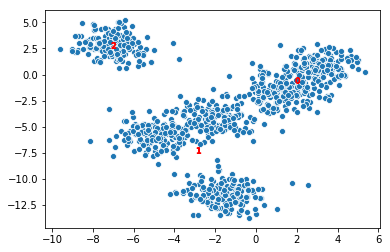

In [11]:
sns.scatterplot(x = X[:,0], y = X[:,1])

# show the cluster centers
for index, center in enumerate(model.cluster_centers_):
    plt.scatter(center[0], center[1], 
                marker = f'${index}$',
                color = 'red')


In [12]:
# The residual of the algorithm is given by "inertia_"
# It is the total distance of all points to their
# respective cluster centers
model.inertia_

8387.742335394987

## Determining the optimal number of clusters using Elbow method

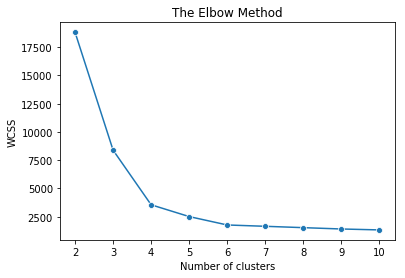

In [13]:
trial_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

scores = []
for k in trial_n_clusters:
    model = KMeans(n_clusters = k)
    model.fit(features)
    scores.append(model.inertia_)

sns.lineplot(
    x = trial_n_clusters,
    y = scores,
    marker='o'
)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
# Within-Cluster-Sum-of-Squares = sum of distances of observations from their cluster centroids

plt.show()

Optimal is 6

* NB:

    * WCSS = within-cluster sum-of-squares criterion = inertia = $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

    (i.e. measure of how internally coherent clusters are)

## Final KMeans run with optimal number of clusters

In [14]:
model = KMeans(n_clusters = 6)
model.fit(features)

# predict cluster each point belongs to
cluster = model.predict(features)

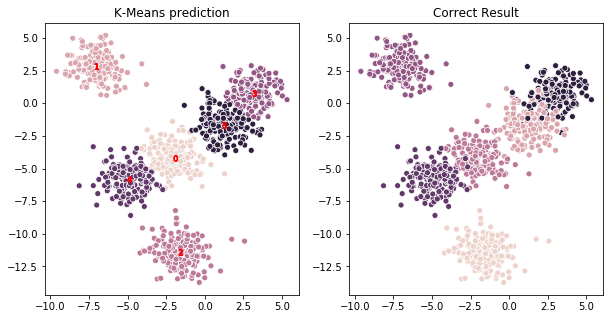

In [15]:
# visualise the clusters, and compare with correct result
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('K-Means prediction')
sns.scatterplot(
    x = features[:,0],
    y = features[:,1],
    hue = cluster,
    legend = False
)
for c_name, c_pos in enumerate(model.cluster_centers_):
    plt.scatter(c_pos[0], c_pos[1],
                marker=f'${c_name}$',
                color='red')
    
plt.subplot(122)
plt.title('Correct Result')
sns.scatterplot(
    x = features[:,0],
    y = features[:,1],
    hue = labels,
    legend = False
)

plt.show()

# Evaluation of errors

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(labels, cluster)

array([[  0,   0, 167,   0,   0,   0],
       [  4,   0,   0,  10,   0, 153],
       [160,   0,   0,   0,   3,   4],
       [  0, 167,   0,   0,   0,   0],
       [  7,   0,   0,   0, 159,   0],
       [  0,   0,   0, 150,   0,  16]], dtype=int64)